In [5]:
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Setup Data
from utils.data import X, y_raw, y_log
from utils.visualization import plot_decisions


%matplotlib inline

## Parameter Tuning

In [6]:
gamma_range = param_range = np.linspace(0, 1, num=1000)

In [7]:
grid_search = GridSearchCV(
    SVR(),
    param_grid={"gamma": gamma_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [8]:
grid_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': array([0.   , 0.001, ..., 0.999, 1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [9]:
grid_search.best_estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
grid_search.best_score_

-1.1952608163115621

## Visualize Decisions

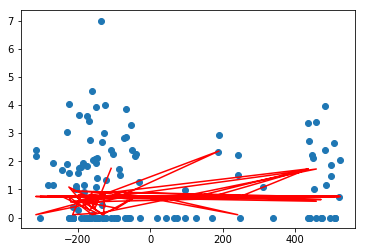

In [11]:
plot_decisions(grid_search.best_estimator_, X, y_log)